In [48]:
%matplotlib inline
import scipy
from scipy import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats


def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

Text(0.5, 0, 'Areas')

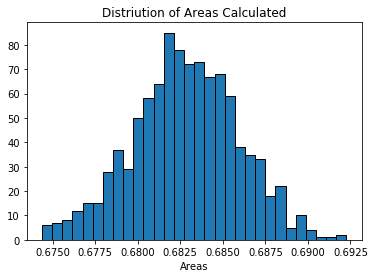

In [93]:
# Problem 1
a=-1
b=1
N = 1000
xrand = np.zeros(N)
def func(x):
    #return 5*x*x*x*x
    return 1/np.sqrt(2*scipy.pi)*scipy.exp(-(x*x)/2)
integral = 0.0
for i in range(N):
    integral += func(xrand[i])
areas = []
means = []
for i in range(N):
    xrand = np.zeros(N)
    
    for i in range(len(xrand)):
        xrand[i] = random.uniform(a,b)
        integral = 0.0

    for i in range(N):
        integral += func(xrand[i])
        
    answer = (b-a)/float(N)*integral
    areas.append(answer)
    means.append(answer)
    means[-1] = sum(means)/len(means)
plt.title("Distriution of Areas Calculated")
plt.hist(areas, bins=30, ec='black')
plt.xlabel("Areas")

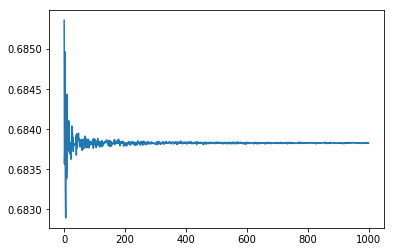

In [94]:
plt.plot(means)

In [95]:
mean_confidence_interval(areas)

(0.6827965241305645, 0.6826039694192173, 0.6829890788419116)

In [310]:
#problem 2

def get_rand_number(min_value, max_value):
    range = max_value - min_value
    choice = random.uniform(0,1)
    return min_value + range*choice


def f_of_x(x):
    #return 5*x*x*x*x
    x=x+4 # integral from 4 to infinite
    return 1/np.sqrt(2*scipy.pi)*scipy.exp(-(x*x)/2)


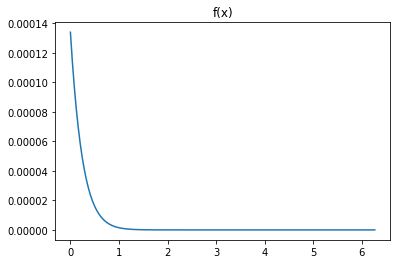

In [311]:
xs = [float(i/100) for i in range(int(100*PI*2))]
ys = [f_of_x(x) for x in xs]
plt.plot(xs,ys)
plt.title("f(x)");

In [312]:
def g_of_x(x, A, lamda):
    return A*scipy.exp(-1*lamda*x)

def inverse_G_of_r(r, lamda):
    return (-1 * math.log(float(r)))/lamda

def get_IS_variance(lamda, num_samples):

    A = lamda
    int_max = 5
    
    # get sum of squares
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += (f_of_x(x)/g_of_x(x, A, lamda))**2
    
    sum_of_sqs = running_total / num_samples
    
    # get squared average
    running_total = 0
    for i in range(num_samples):
        x = get_rand_number(0, int_max)
        running_total += f_of_x(x)/g_of_x(x, A, lamda)
    sq_ave = (running_total/num_samples)**2
    
    
    return sum_of_sqs - sq_ave

# get variance as a function of lambda by testing many
# different lambdas

test_lamdas = [i*0.05 for i in range(1, 61)]
variances = []

for i, lamda in enumerate(test_lamdas):
    print(f"lambda {i+1}/{len(test_lamdas)}: {lamda}")
    A = lamda
    variances.append(get_IS_variance(lamda, 10000))
    
optimal_lamda = test_lamdas[np.argmin(np.asarray(variances))]
IS_variance = variances[np.argmin(np.asarray(variances))]

print(f"Optimal Lambda: {optimal_lamda}")
print(f"Optimal Variance: {IS_variance}")
print(f"Error: {(IS_variance/10000)**0.5}")

lambda 1/60: 0.05
lambda 2/60: 0.1
lambda 3/60: 0.15000000000000002
lambda 4/60: 0.2
lambda 5/60: 0.25
lambda 6/60: 0.30000000000000004
lambda 7/60: 0.35000000000000003
lambda 8/60: 0.4
lambda 9/60: 0.45
lambda 10/60: 0.5
lambda 11/60: 0.55
lambda 12/60: 0.6000000000000001
lambda 13/60: 0.65
lambda 14/60: 0.7000000000000001
lambda 15/60: 0.75
lambda 16/60: 0.8
lambda 17/60: 0.8500000000000001
lambda 18/60: 0.9
lambda 19/60: 0.9500000000000001
lambda 20/60: 1.0
lambda 21/60: 1.05
lambda 22/60: 1.1
lambda 23/60: 1.1500000000000001
lambda 24/60: 1.2000000000000002
lambda 25/60: 1.25
lambda 26/60: 1.3
lambda 27/60: 1.35
lambda 28/60: 1.4000000000000001
lambda 29/60: 1.4500000000000002
lambda 30/60: 1.5
lambda 31/60: 1.55
lambda 32/60: 1.6
lambda 33/60: 1.6500000000000001
lambda 34/60: 1.7000000000000002
lambda 35/60: 1.75
lambda 36/60: 1.8
lambda 37/60: 1.85
lambda 38/60: 1.9000000000000001
lambda 39/60: 1.9500000000000002
lambda 40/60: 2.0
lambda 41/60: 2.0500000000000003
lambda 42/60: 2.

In [339]:
temp = []
def importance_sampling_MC(lamda, num_samples):
    A = lamda
    
    running_total = 0
    for i in range(num_samples):
        r = get_rand_number(0,1)
        running_total += f_of_x(inverse_G_of_r(r, lamda=lamda))/g_of_x(inverse_G_of_r(r, lamda=lamda), A, lamda)
        temp.append(running_total/(i+1))
    approximation = float(running_total/num_samples)
    return approximation

# run simulation
num_samples = 100000
approx = importance_sampling_MC(optimal_lamda, num_samples)
variance = get_IS_variance(optimal_lamda, num_samples)
error = (variance/num_samples)**0.5

# display results
print(f"Importance Sampling Approximation: {approx}")
print(f"Variance: {variance}")
print(f"Error: {error}")

Importance Sampling Approximation: 3.166777599810745e-05
Variance: 1.1600035335995893e-10
Error: 3.405882460684146e-08


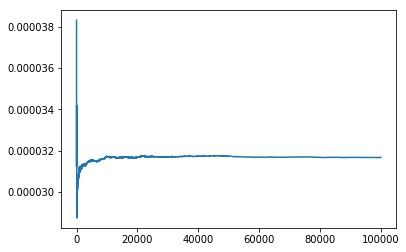

In [340]:
plt.plot(temp)

In [341]:
mean_confidence_interval(temp)

(3.166154390448059e-05, 3.166062888114288e-05, 3.1662458927818304e-05)